In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Set up the Selenium web driver (you'll need to download the appropriate driver, e.g., ChromeDriver)
#driver = webdriver.Chrome()

games_list = ['Ratz Instagib','The Riflemen', 'Party Animals', 'Crab Game', 'Bopl Battle', 'Worms W.M.D', 'Worms Rumble', 'Worms_Ultimate_Mayhem'] 
id_list = ['338170', '2022330', '1260320', '1782210', '1686940', '327030', '1186040', '70600']

gamedf = pd.DataFrame({'title': games_list, 'id': id_list})
gamedf


,title,id
0,Ratz Instagib,338170
1,The Riflemen,2022330
2,Party Animals,1260320
3,Crab Game,1782210
4,Bopl Battle,1686940
5,Worms W.M.D,327030
6,Worms Rumble,1186040
7,Worms_Ultimate_Mayhem,70600


scrape the Genres and tags from the provided games list

In [6]:
import requests
from bs4 import BeautifulSoup

def get_genres_and_tags(app_id):
    url = f"https://store.steampowered.com/app/{app_id}/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract genres (found under a specific div)
        genres_div = soup.find('div', {'class': 'details_block'})
        genres = []
        if genres_div:
            genre_links = genres_div.find_all('a', href=True)
            for genre in genre_links:
                if 'genre' in genre['href']:
                    genres.append(genre.text.strip())

        # Extract user tags (found under another div)
        tags_div = soup.find('div', {'class': 'glance_tags popular_tags'})
        tags = []
        if tags_div:
            tag_links = tags_div.find_all('a', {'class': 'app_tag'})
            tags = [tag.text.strip() for tag in tag_links]

        #print(f"Genres: {', '.join(genres)}")
        #print(f"Tags: {', '.join(tags)}")

    else:
        print(f"Error: {response.status_code}")
    return(genres, tags)


gendict = {} 
tagdict = {}

for id in id_list:
    app_id = id  # Example for Hades
    gens, tags = get_genres_and_tags(app_id)
    for gen in gens: 
        if gen not in gendict.keys():
            gendict[gen] = 1
        else: 
            gendict[gen] = gendict[gen] + 1
    for tag in tags: 
        if tag not in tagdict.keys():
            tagdict[tag] = 1
        else: 
            tagdict[tag] = tagdict[tag] + 1


In [7]:
tagRemoveList = []

for tag in tagdict: 
    if tagdict[tag] < 3: 
        tagRemoveList.append(tag)

tagdictSlimmed = tagdict
for tagRem in tagRemoveList: 
    tagdictSlimmed.pop(tagRem)

false_tags = ['First-Person', 'Singleplayer', 'Co-op', 'Online Co-Op', 'Local Multiplayer', 'Local Co-Op', 'Platformer', 'Strategy', 'FPS']
false_removed_tags = []
false_removed_tags = tagdictSlimmed

for t in false_tags:
    false_removed_tags.pop(t)

false_removed_tags

{'Action': 8,
 'Arena Shooter': 3,
 'Multiplayer': 8,
 'Shooter': 5,
 'Casual': 6,
 'Cartoony': 3,
 'PvP': 5,
 '3D': 3,
 'Funny': 5,
 'Physics': 3,
 'Comedy': 4}

In [228]:
gendict

{'Action': 7,
 'Indie': 4,
 'Casual': 3,
 'Free To Play': 2,
 'Racing': 1,
 'Strategy': 2}

Text(0, 0.5, 'count')

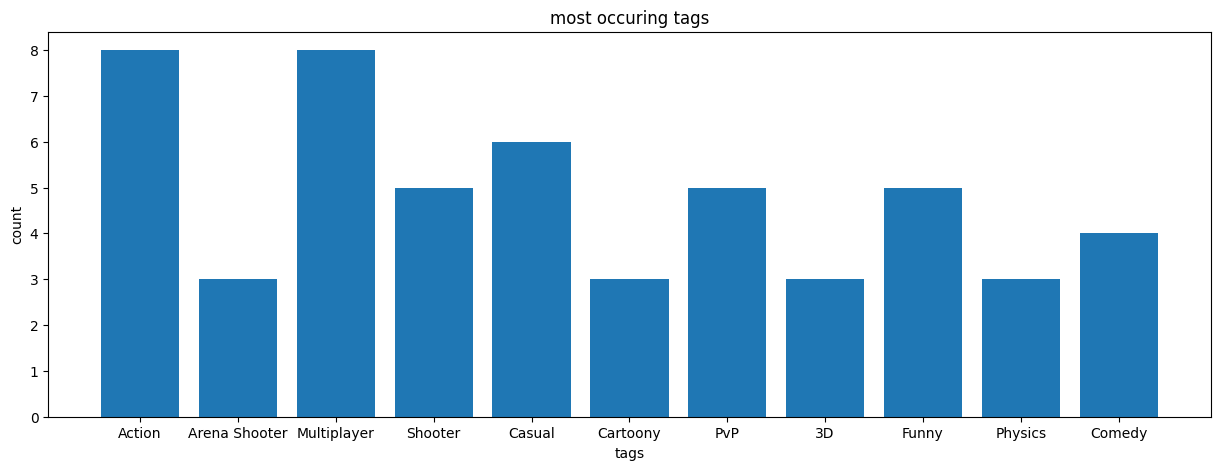

In [24]:
fig = plt.figure(figsize = (15, 5))
plt.bar(false_removed_tags.keys(), false_removed_tags.values())
plt.title("most occuring tags")
plt.xlabel("tags")
plt.ylabel("count")

Text(0, 0.5, 'count')

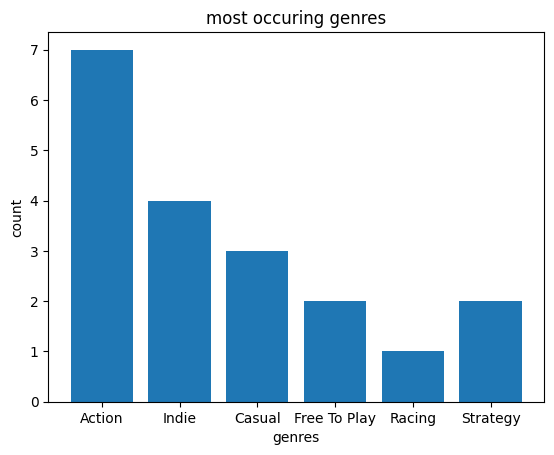

In [25]:
plt.bar(gendict.keys(), gendict.values())
plt.title("most occuring genres")
plt.xlabel("genres")
plt.ylabel("count")

In [42]:
import requests
from bs4 import BeautifulSoup

Titles = [] 
ids = [] 


# Steam URL for top sellers with Indie (492) and Action (19) and Casual (597) tags
url = "https://store.steampowered.com/search/?filter=topsellers&tags=492,19,597,3859,4136"

response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the page content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the game titles (adjust if Steam changes structure)
    #filtered_games = soup.find_all('span', class_='title')
    filtered_games = soup.find_all('a', class_='search_result_row')
    
    # Print the top 10 filtered games
    for i, game in enumerate(filtered_games[:30]):
        #print(f"Rank {i+1}: {game.text}")
        Titles.append(game.find('span', class_='title').text)
        ids.append(game['href'].split('/')[4])

else:
    print("Failed to retrieve the Steam top sellers page")

GenreGames = pd.DataFrame({'titles': Titles, 'ids': ids})

In [43]:
GenreGames

,titles,ids
0,Bloons TD 6,960090
1,Party Animals,1260320
2,Goose Goose Duck,1568590
3,Garry's Mod,4000
4,Overcooked! 2,728880
5,Biped,1071870
6,PICO PARK,1509960
7,Wobbly Life,1211020
8,Who's Your Daddy?!,427730
9,Stick Fight: The Game,674940


Extracting Reviews

In [47]:
import requests
import pandas as pd

def get_reviews(app_id, num_reviews=100):
    reviews_list = []
    url = f'https://store.steampowered.com/appreviews/{app_id}?json=1&num_per_page=100'
    total_reviews_fetched = 0
    start_offset = 0

    while total_reviews_fetched < num_reviews:
        # Update the URL with the start offset to get the next page of reviews
        paginated_url = f"{url}&start_offset={start_offset}"
        response = requests.get(paginated_url)

        if response.status_code == 200:
            data = response.json()
            reviews = data['reviews']

            if not reviews:
                print("No more reviews available.")
                break

            # Add reviews to the list
            for review in reviews:
                review_text = review['review']
                votes_up = review['votes_up']
                rating = 'Positive' if review['voted_up'] else 'Negative'

                reviews_list.append({
                    'Review': review_text,
                    'Votes_Up': votes_up,
                    'Rating': rating
                })

            total_reviews_fetched += len(reviews)
            start_offset += len(reviews)  # Increment the offset by the number of reviews fetched

        else:
            print(f"Failed to retrieve reviews: {response.status_code}")
            break

    # Convert the reviews list to a DataFrame
    reviews_df = pd.DataFrame(reviews_list[:num_reviews])  # Limit to the requested number of reviews
    return reviews_df

# Example usage
app_id = '1145360'  # Example for Hades
reviews_df = get_reviews(app_id, num_reviews=150)

if reviews_df is not None:
    print(reviews_df.head(100))

                                                Review  Votes_Up    Rating
0    This game is a bit difficult for me, probably ...         7  Positive
1    Great game! Good variety of weapons, simple ga...         4  Positive
2    Its a fine game. But its really nothing specia...         2  Negative
3    I cant recommend this game, and while i have a...         2  Negative
4    Awesome game with a simple gameplay she's givi...         4  Positive
..                                                 ...       ...       ...
115  Amazing classic iso-rogue feel      my first t...         0  Positive
116  I'm not very into rogue-likes, but this is one...         0  Positive
117  So fun and the story as well it adds up as to ...         0  Positive
118  A thrilling roguelike that excels in every cat...         0  Positive
119  fun, fast, replayable up to some point\nthe mu...         0  Positive

[120 rows x 3 columns]


In [59]:
#list of similar Games 
games_list = ['Ratz Instagib','The Riflemen', 'Party Animals', 'Crab Game', 'Bopl Battle', 'Worms W.M.D', 'Worms Rumble', 'Worms_Ultimate_Mayhem'] 
id_list = ['338170', '2022330', '1260320', '1782210', '1686940', '327030', '1186040', '70600']

gamedf = pd.DataFrame({'title': games_list, 'id': id_list})
gamedf

,title,id
0,Ratz Instagib,338170
1,The Riflemen,2022330
2,Party Animals,1260320
3,Crab Game,1782210
4,Bopl Battle,1686940
5,Worms W.M.D,327030
6,Worms Rumble,1186040
7,Worms_Ultimate_Mayhem,70600


In [ ]:
genreList = ['indie']